# 探索性数据分析(EDA)

- 在本次实验中，我们的任务是在给定的数据集上实现聚类算法，我们在进行代码编写前，应该完成对于数据集的认知工作，一方面能够对于聚类结果有一个直观的估计，另一方面也能加深对于聚类算法效果的理解。


- 由于数据集本身由若干二维 point 组成，我们 EDA 的任务是：

    1. 统计数据点个数（数据集规模）

    2. 使用 `matplotlib` 绘制数据的分布图

In [1]:
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def construct_dataset(data_path="./data/cluster.dat"):
    dataset = []
    with open(data_path) as f:
        for line in f.readlines():
            point_tmp = line.strip().split(' ')
            dataset.append([float(point_tmp[0]), float(point_tmp[1])])
    return np.array(dataset)

PointSet = construct_dataset()
# show total Points number.
print(f"PointSet has {len(PointSet)} data")

PointSet has 1000 data


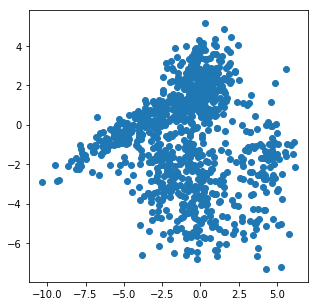

In [3]:
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(PointSet[:, 0], PointSet[:, 1])

## Now use Sklearn to get more sence

In [4]:
from sklearn import mixture

np.random.seed(1)
g = mixture.GMM(n_components=2, covariance_type='full')

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
g.fit(PointSet)

Y_ = g.predict(PointSet)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWa

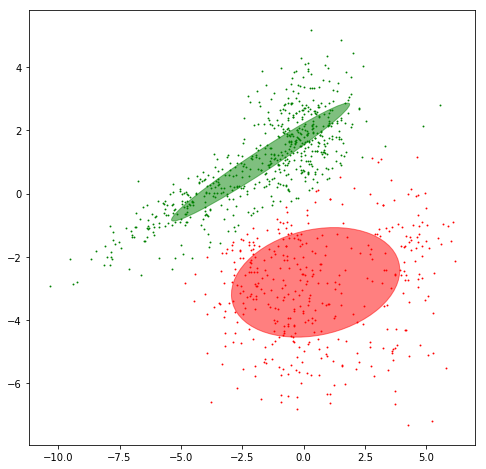

In [7]:
import itertools
from scipy import linalg
import matplotlib as mpl

plt.rcParams['figure.figsize'] = 8, 8

color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])

splot = plt.subplot(1, 1, 1)
for i, (mean, covar, color) in enumerate(zip(
            g.means_, g._get_covars(), color_iter)):
    v, w = linalg.eigh(covar)
    u = w[0] / linalg.norm(w[0])
    # as the DP will not use every component it has access to
    # unless it needs it, we shouldn't plot the redundant
    # components.
    if not np.any(Y_ == i):
        continue
    plt.scatter(PointSet[Y_ == i, 0], PointSet[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.5)
    splot.add_artist(ell)